# Student Performance Indicator

### 1. Problem Statement
This project helps in understanding how the students' scores are affected by a number of factors (like Gender, Parental level of education, Ethnicity, Test preparation course etc.).

### Dataset source:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### IMPORTING DATA AND LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Creating a pandas dataframe from the imported data
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("Shape of the dataset is")
df.shape

Shape of the dataset is


(1000, 8)

### PERFORMING DATA CHECKS

#### 1. Checking for missing values

In [6]:
df.isna().sum()
# df.isnull().sum() ------ can also write this

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

#### 2. Checking for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates present in the dataset.

#### 3. Check datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 4. Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 5. Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 6. Exploring Data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 7. Checking various categories present in the different categorical column

In [13]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


#### 8. Defining the numerical & categorical columns

In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 9. Adding 'total score' and 'average' columns

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 10. Printing the number of students with full marks and < 20 marks in math, reading and writing

In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### VISUALIZING THE DATA

#### 1. Histogram and KDE plot

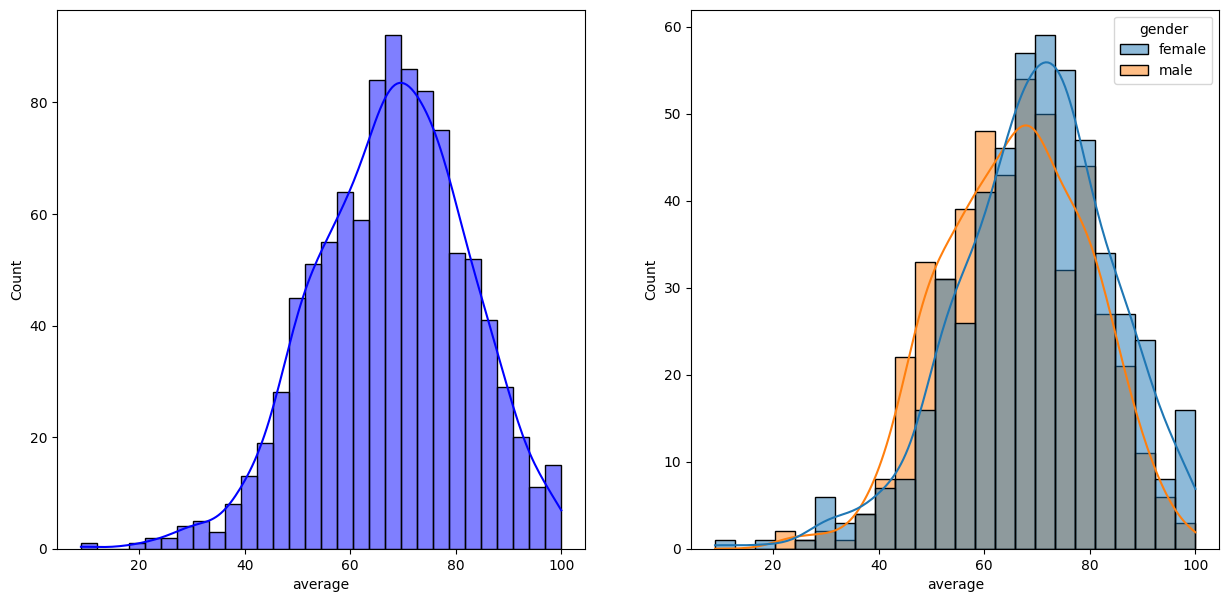

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

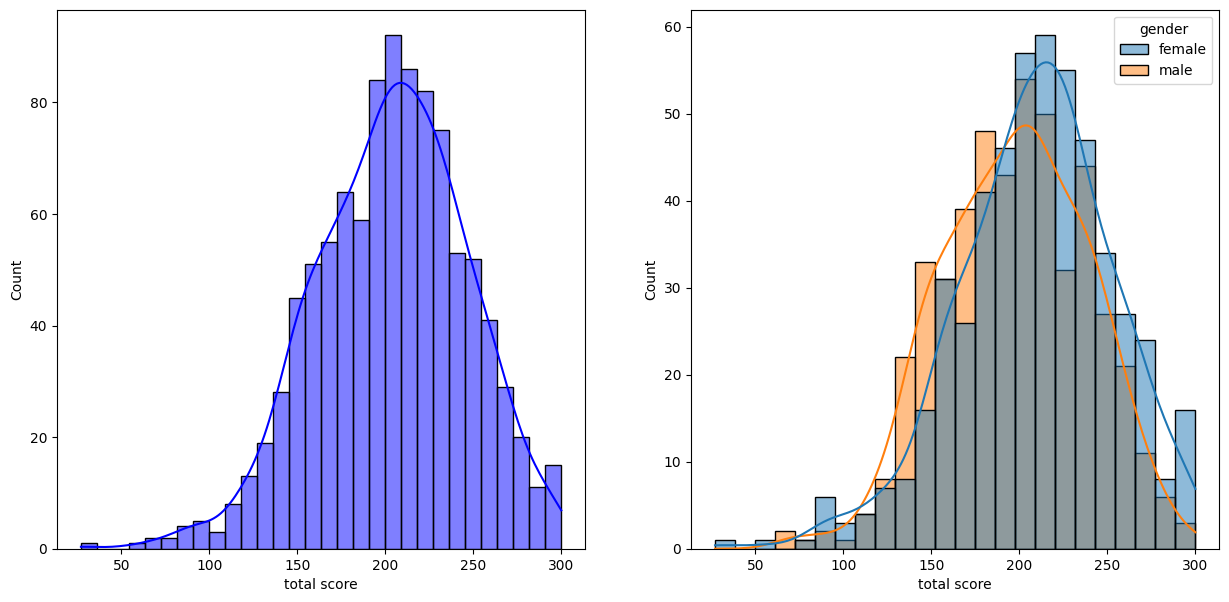

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

__Insights__
<br>
- Female students tend to perform well then male students.

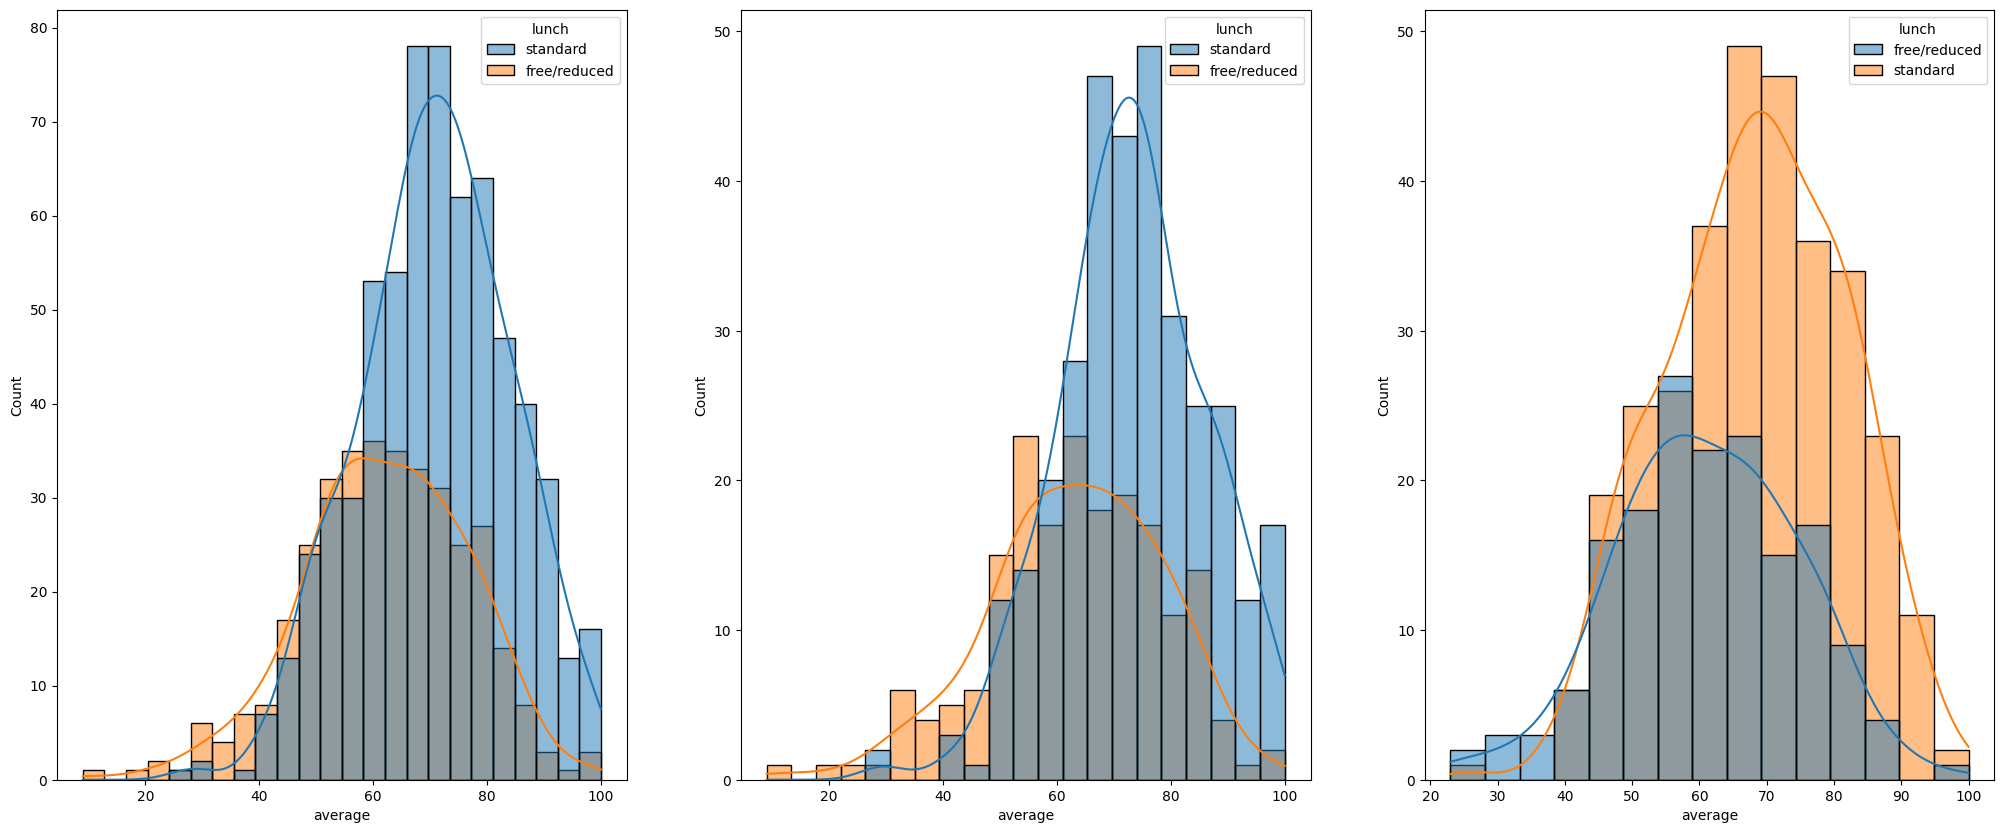

In [28]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

__Insights__
<br>
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

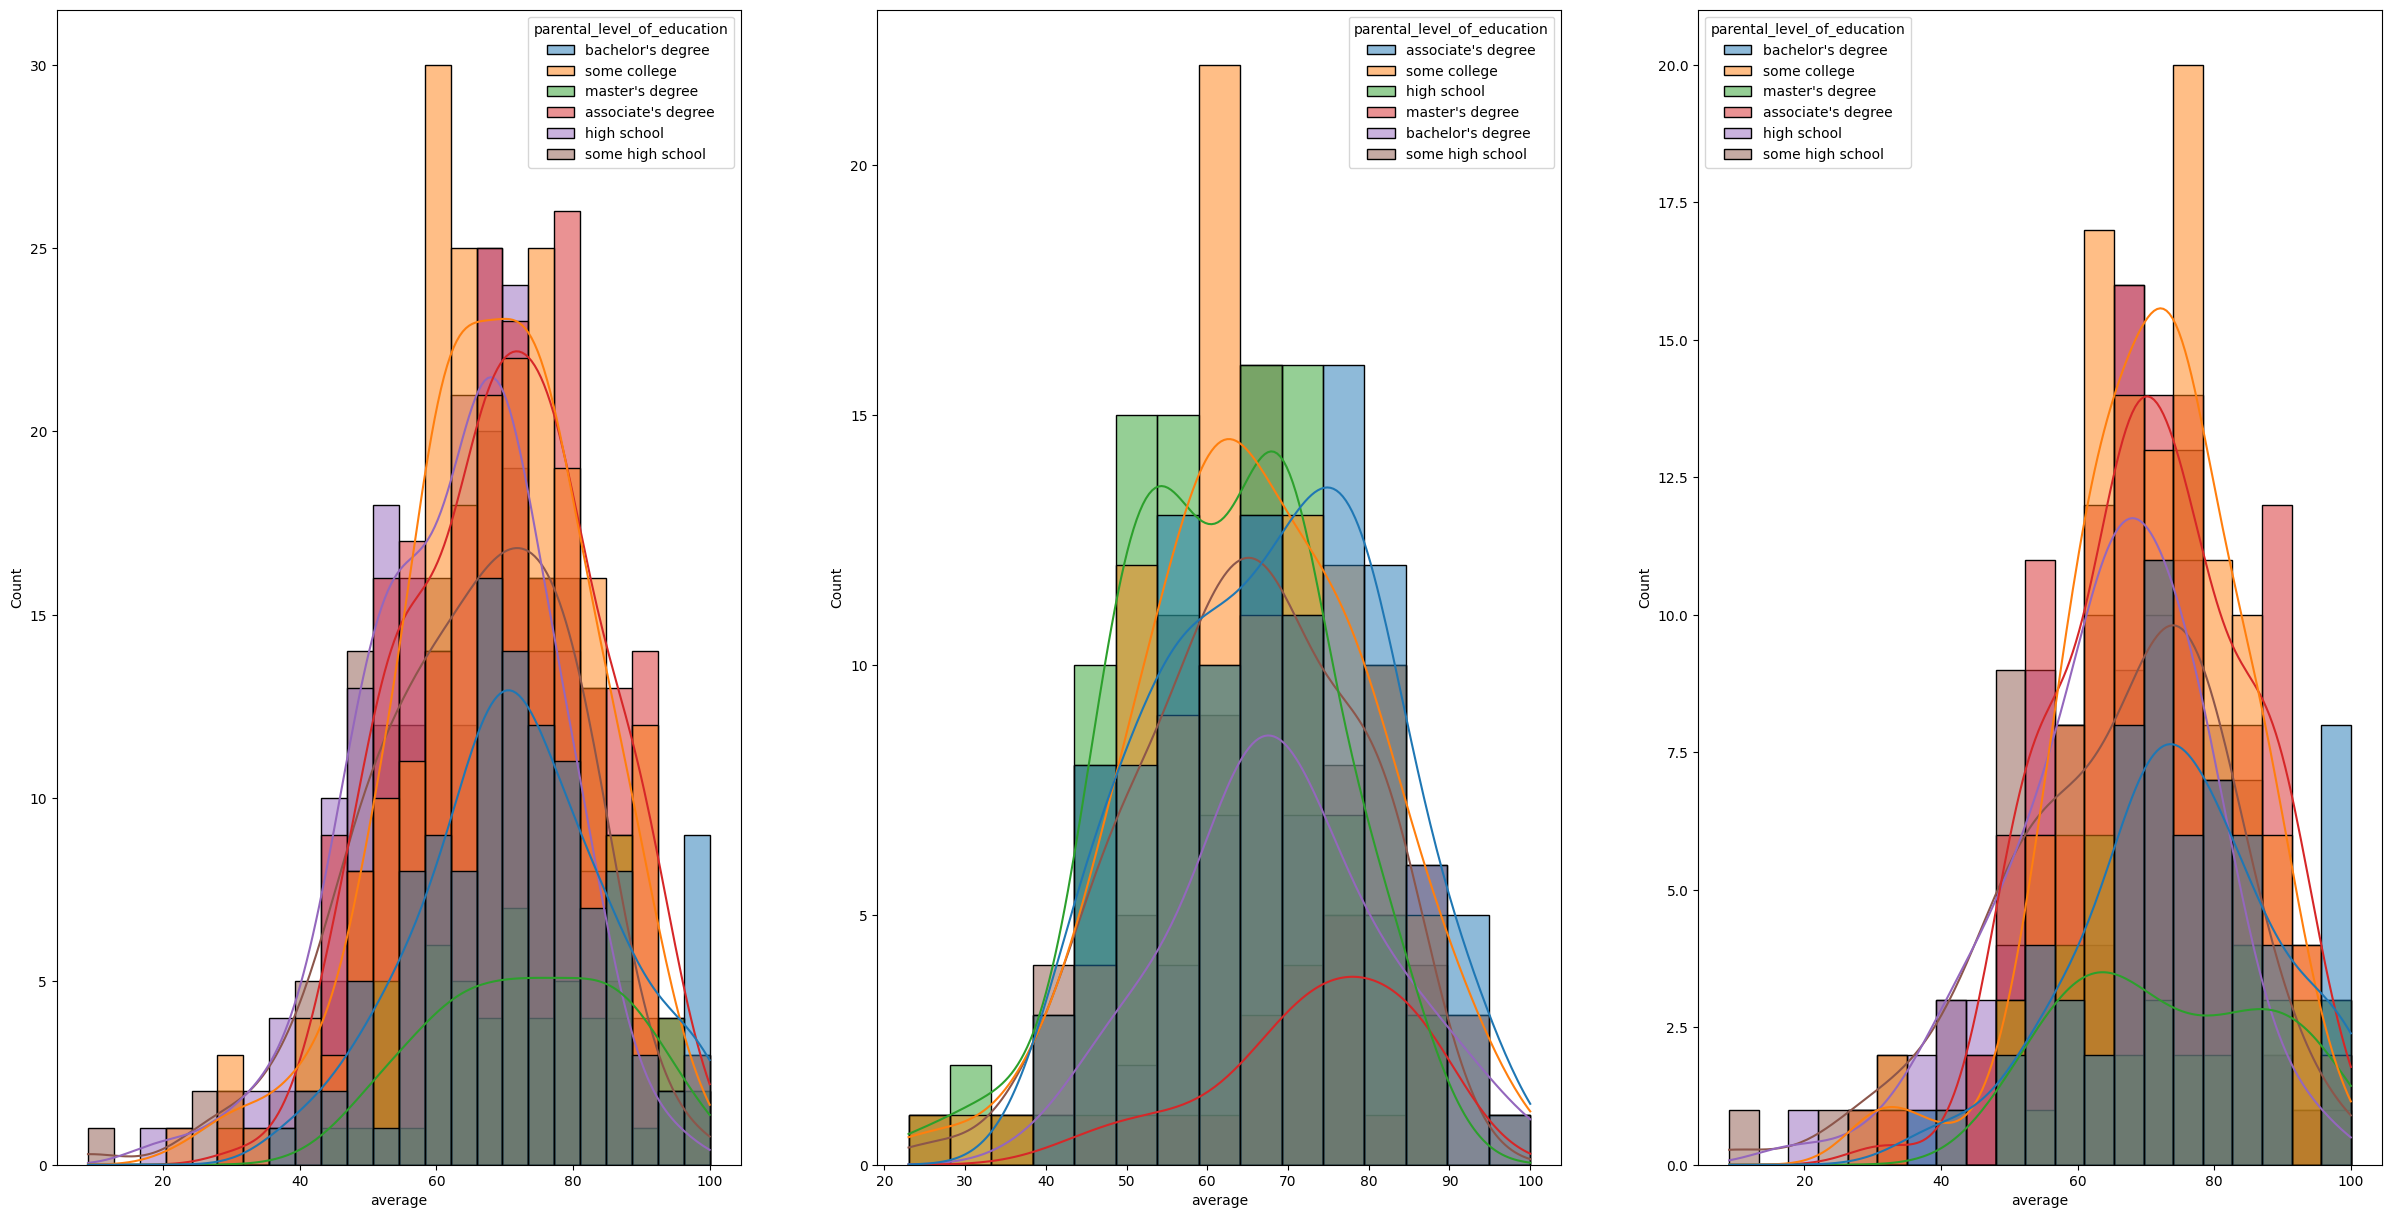

In [32]:
plt.subplots(1,3,figsize=(30,15))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

__Insights__
<br>
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

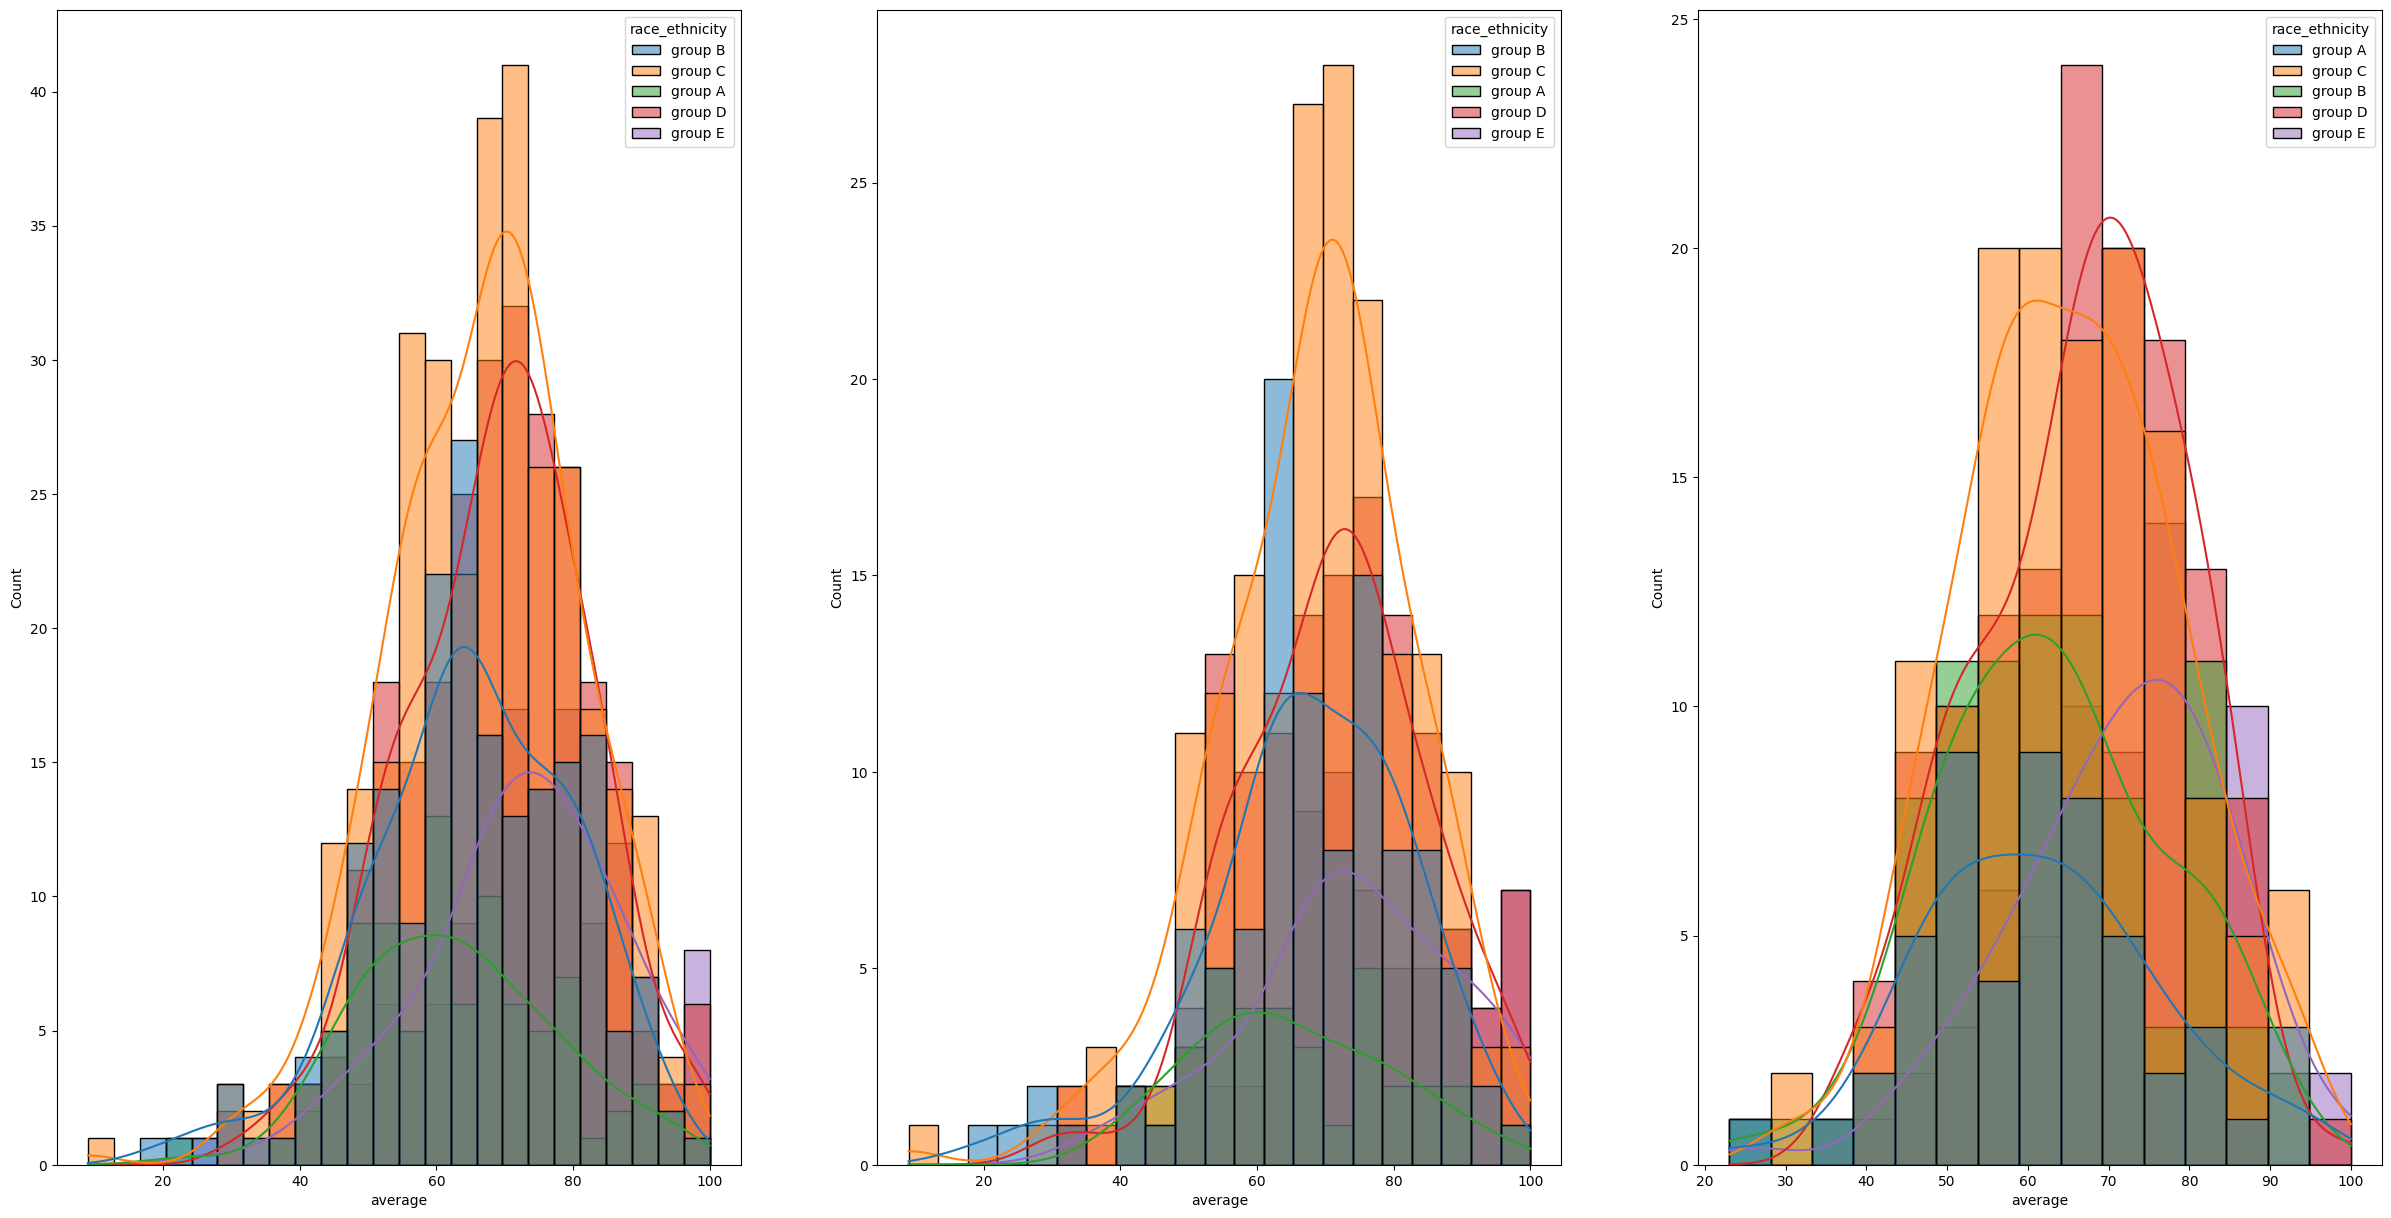

In [34]:
plt.subplots(1,3,figsize=(30,15))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

__Insights__
<br>
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 2. Maximumum score of students in all three subjects

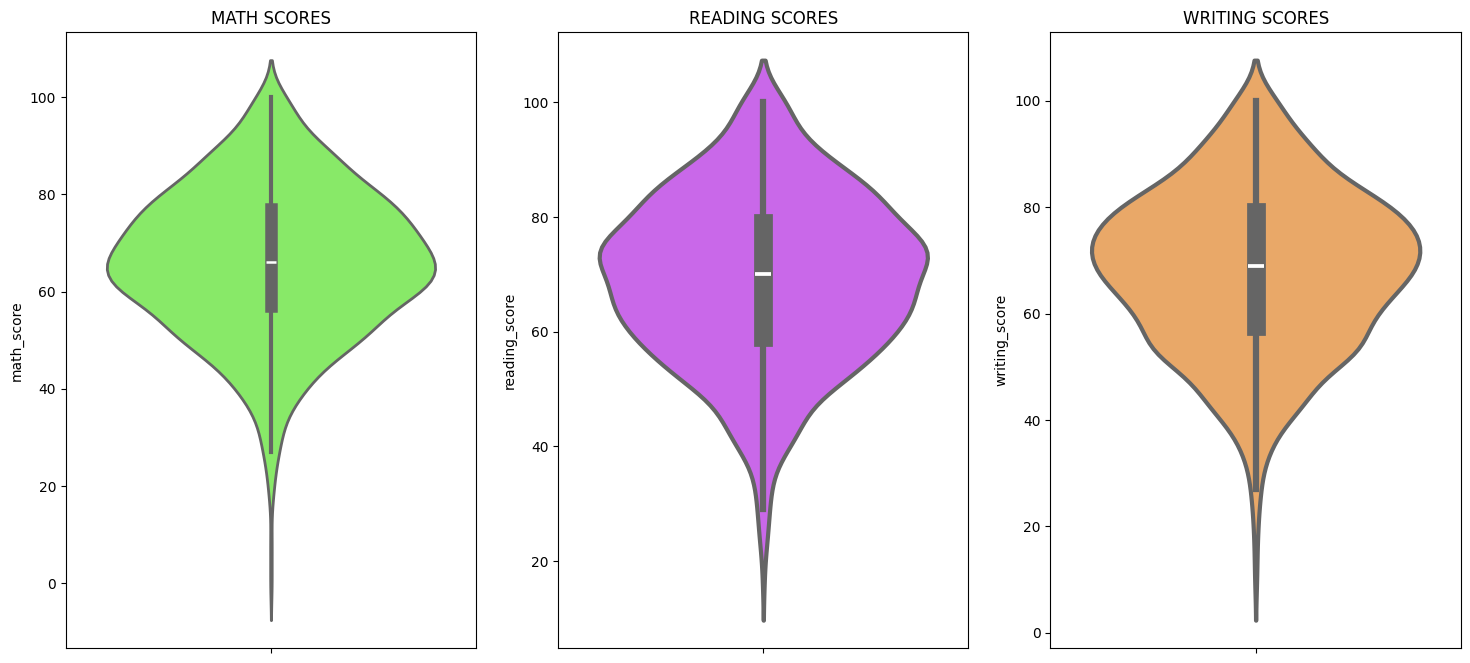

In [46]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='#7dff52',linewidth=2)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='#d452ff',linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='#ffa852',linewidth=3)
plt.show()

__Insights__
<br>
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 3. Multivariate analysis using pieplot

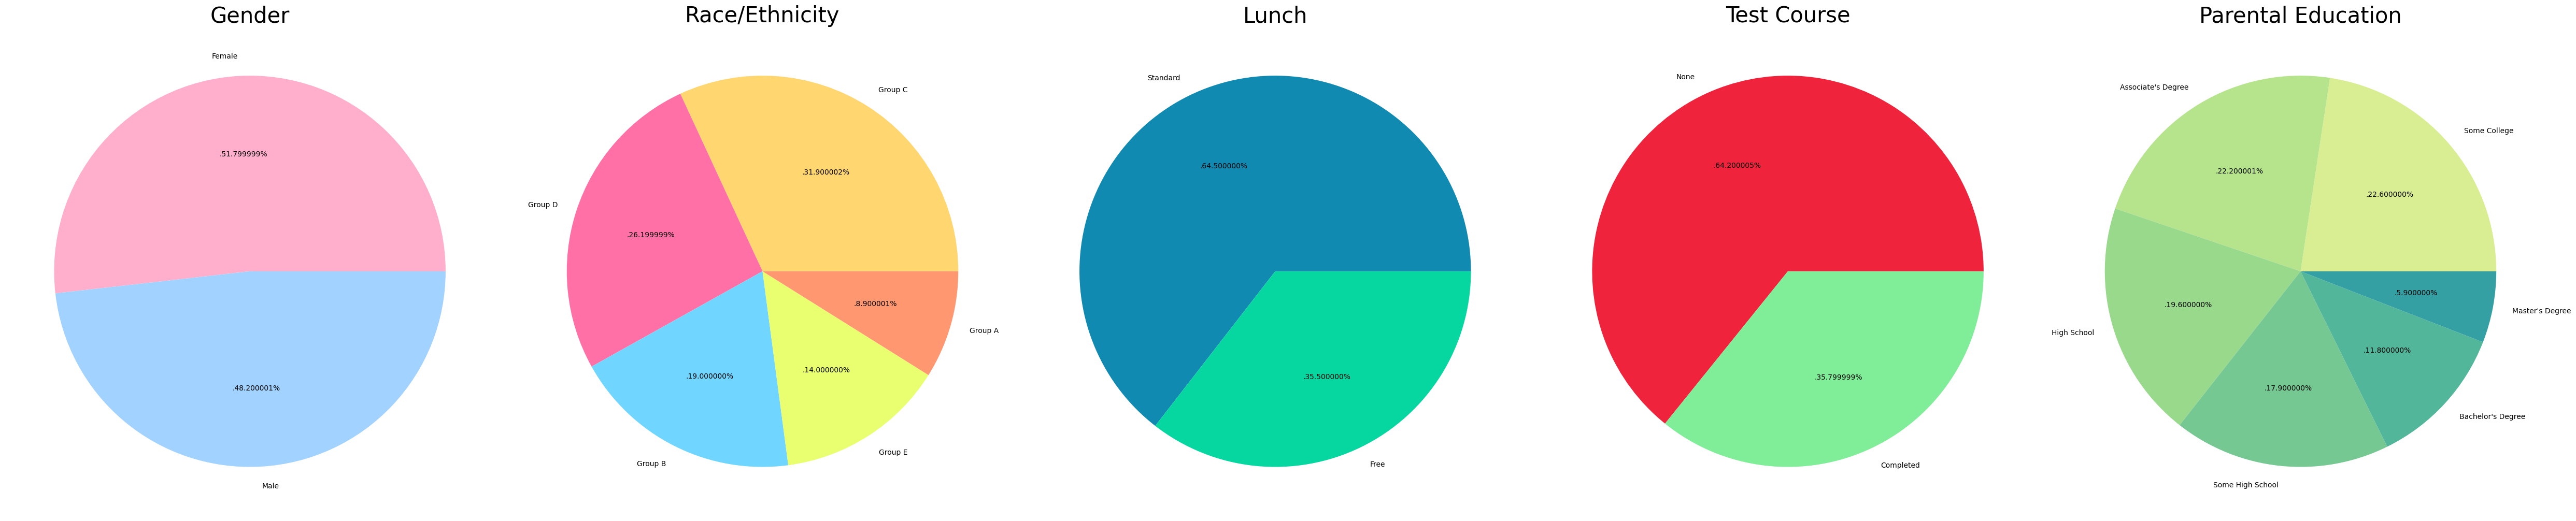

In [54]:
plt.rcParams['figure.figsize'] = (50, 30)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['#ffafcc','#a2d2ff']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['#ffd670', '#ff70a6', '#70d6ff', '#e9ff70','#ff9770']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['#118ab2','#06d6a0']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['#ef233c','#80ed99']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893','#52b69a','#34a0a4']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

__Insights__
<br>
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4. Feature wise visualisation

4.1. On the basis of Gender<br>
- How is the data distributed according to gender? (univariate analysis)
- Does gender affect students' performance? (bivariate analysis)

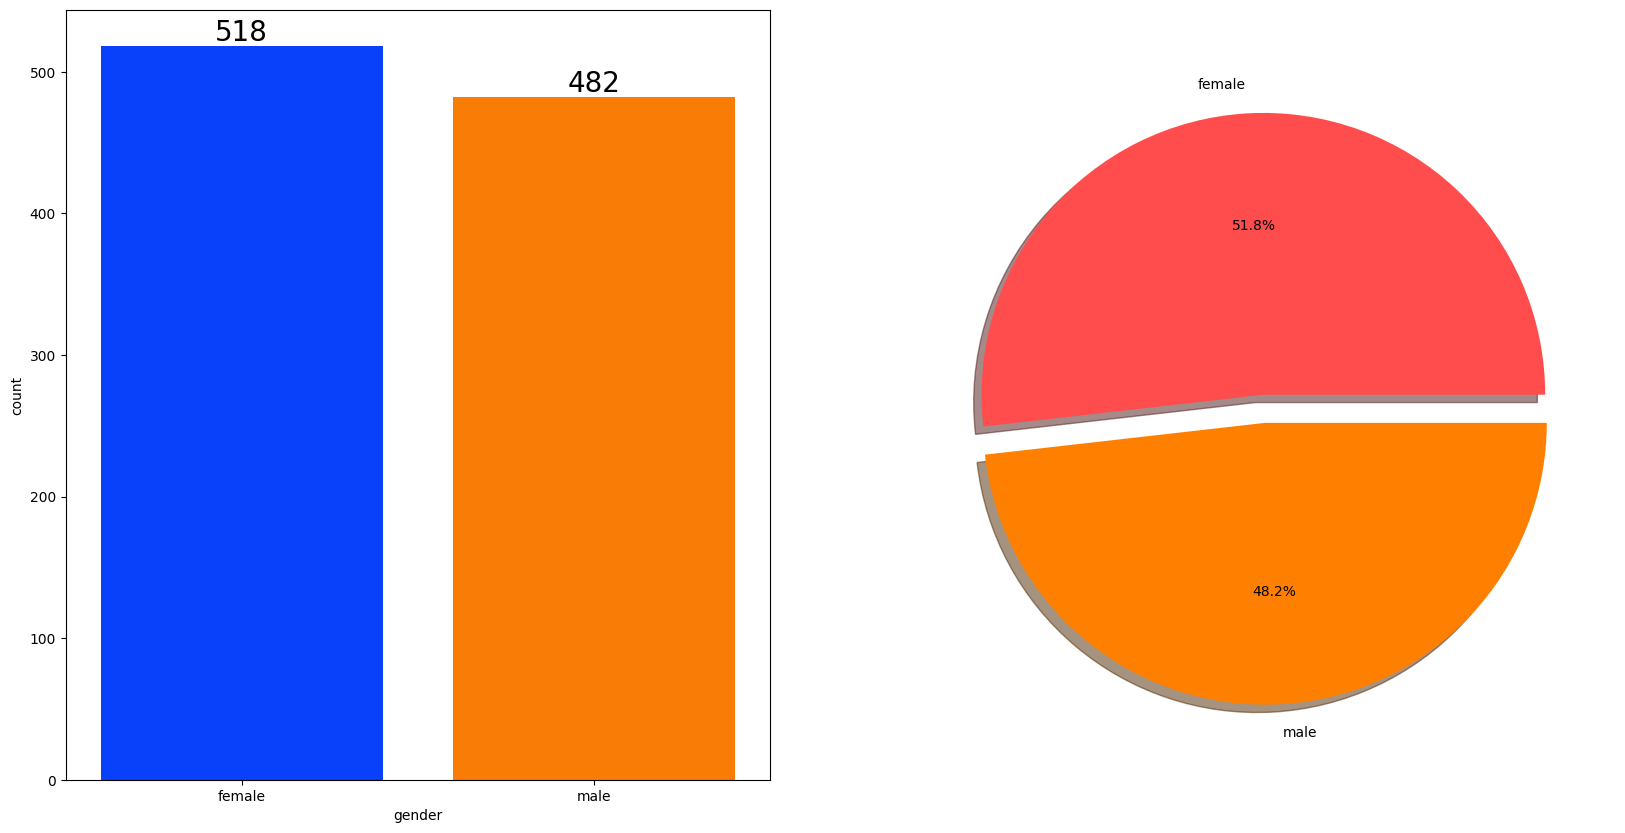

In [58]:
# univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

__Insights__
<br>
- Gender has near balanced data with 51.8% female and 48.2% male students.

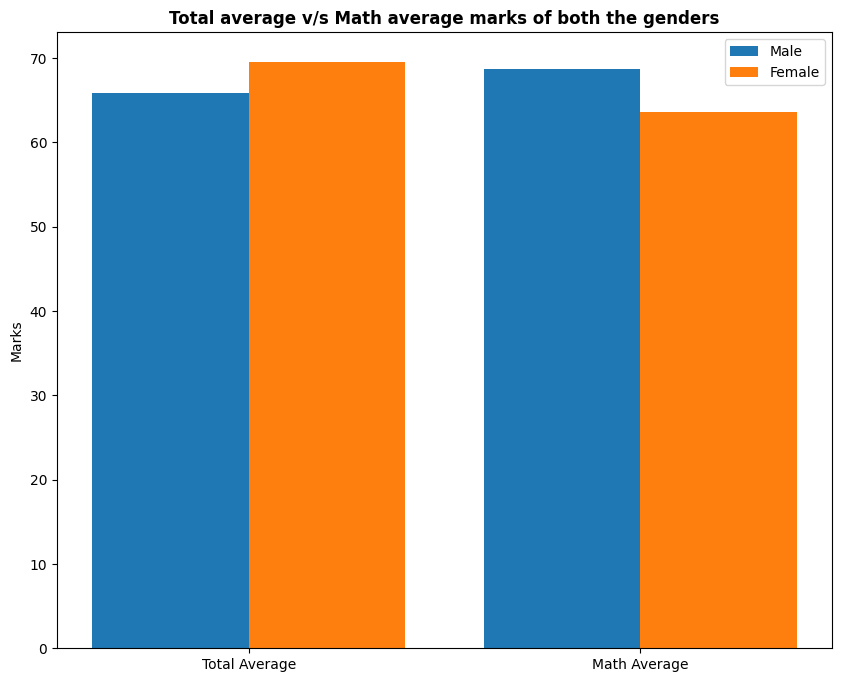

In [63]:
# bivariate analysis

# Group the data by gender and calculate the mean of numeric columns
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

# Extract average and math scores for females (row index 0)
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]

# Extract average and math scores for males (row index 1)
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

# X-axis positions for the grouped bar chart
X_axis = np.arange(len(X))
  
# Draw two bars per category, side-by-side.
# Male bars are slightly shifted to the left of the X tick (-0.2)
# Female bars are slightly shifted to the right of the X tick (+0.2)
# 0.4 is the width of each bar
# label='...' is used in the legend.
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

__Insights__
<br>
- On an average, females have a better overall score than males whereas males have scored higher in Maths.

4.2. On the basis of Race/Ethnicity<br>
- How is the data distributed according to race/ethnicity? (univariate analysis)
- Does it has any impact on the students' performance? (bivariate analysis)

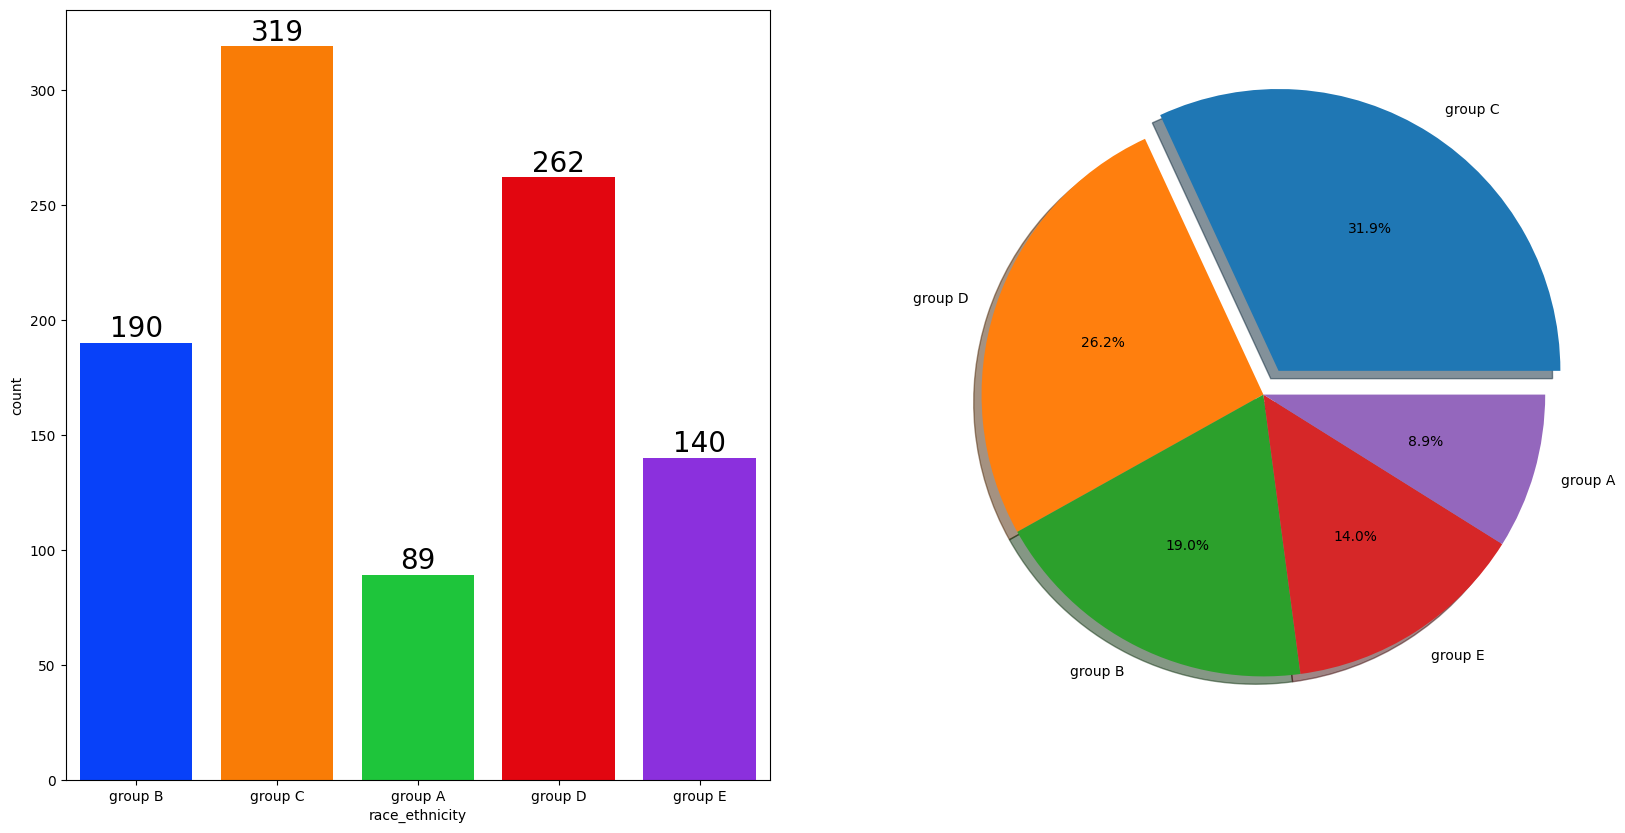

In [64]:
# univariate analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

__Insights__
<br>
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

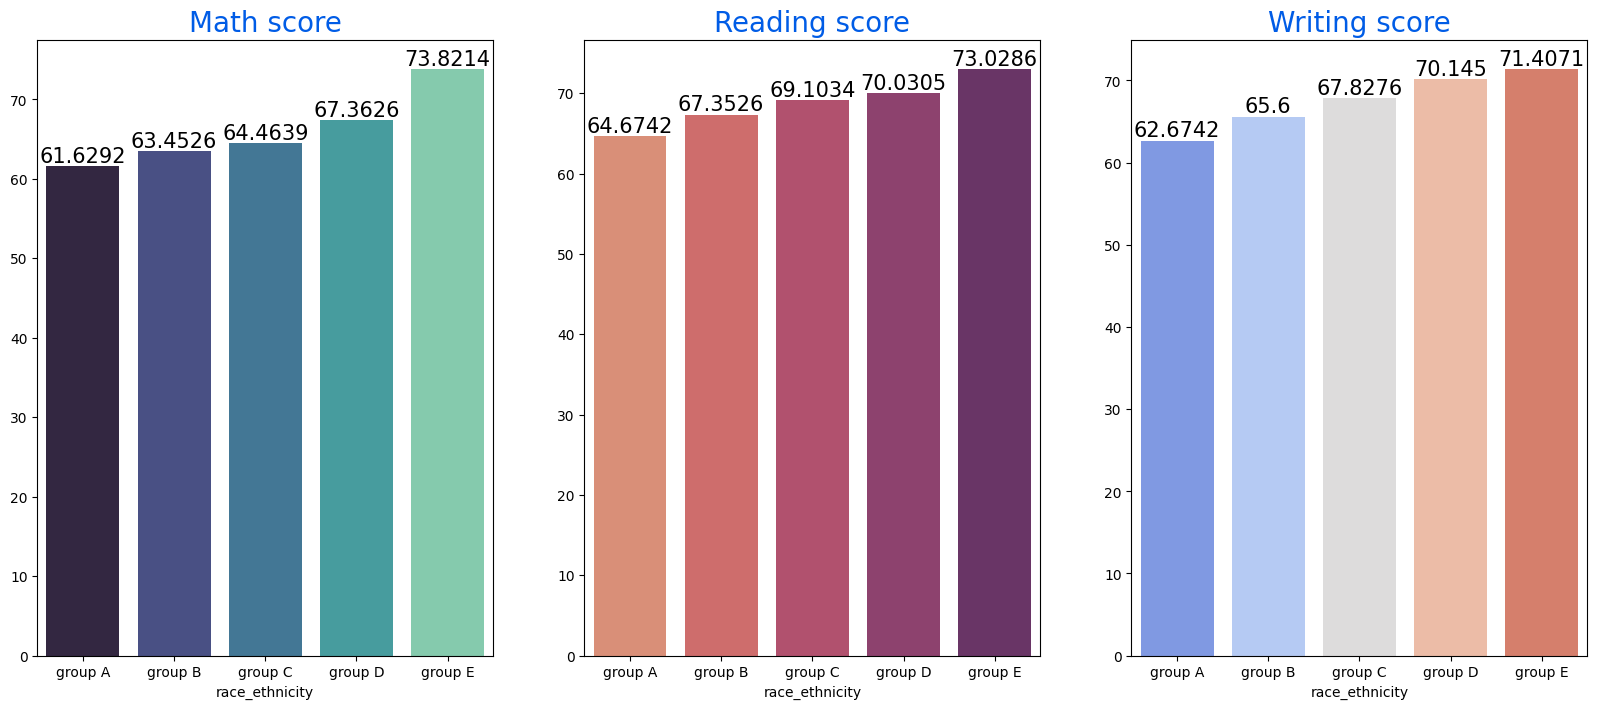

In [66]:
# bivariate analysis
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

__Insights__
<br>
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

4.3. On the basis of Parental Level of Education<br>
- What is the educational background of the studnet's parent? (univariate analysis)
- Does it affect the students' performance? (bivariate analysis)

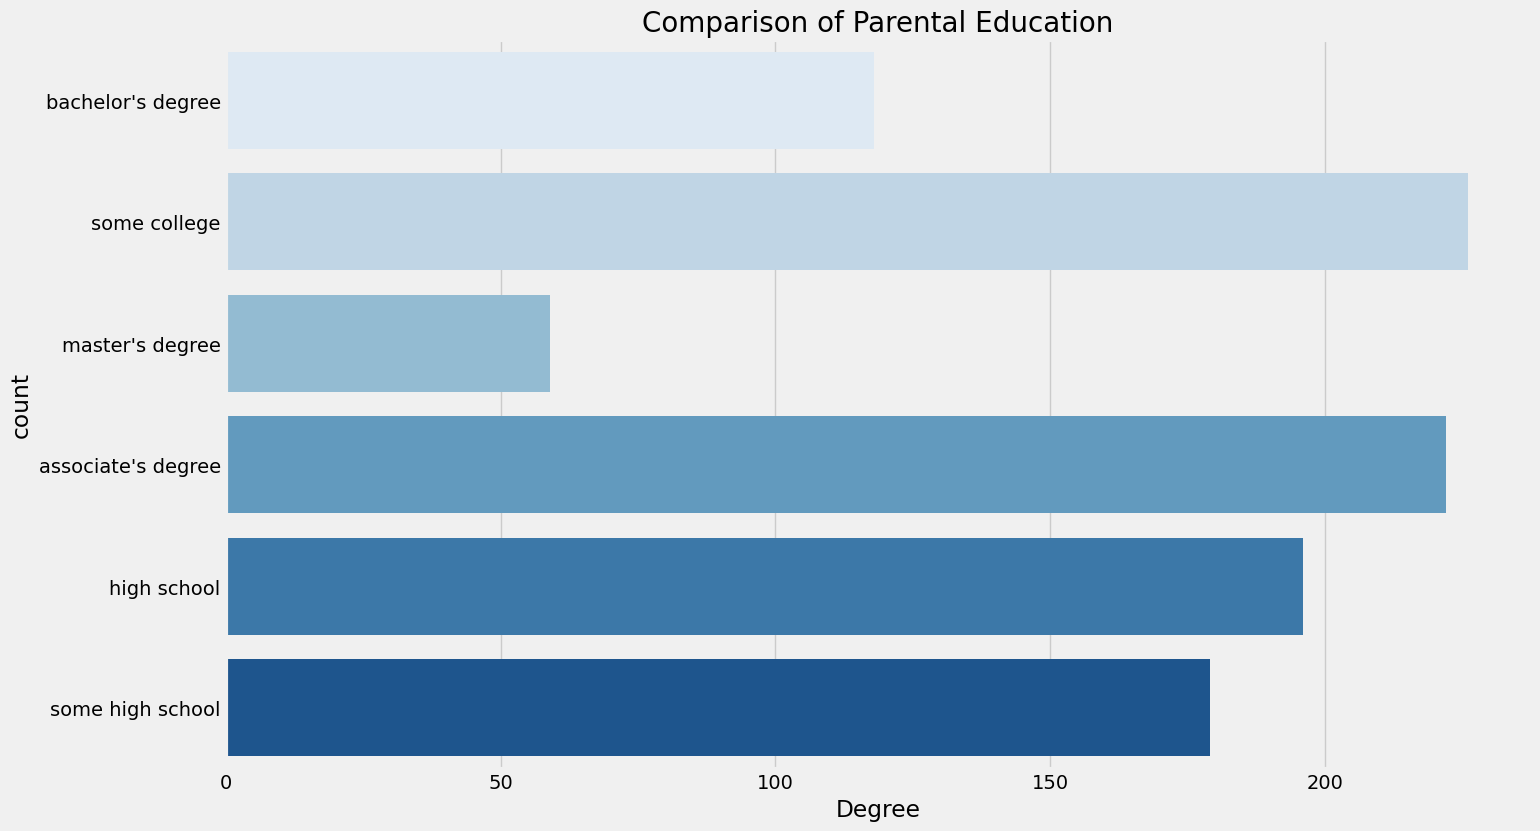

In [68]:
# univariate analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

__Insights__
<br>
- Largest number of parents are from some college.

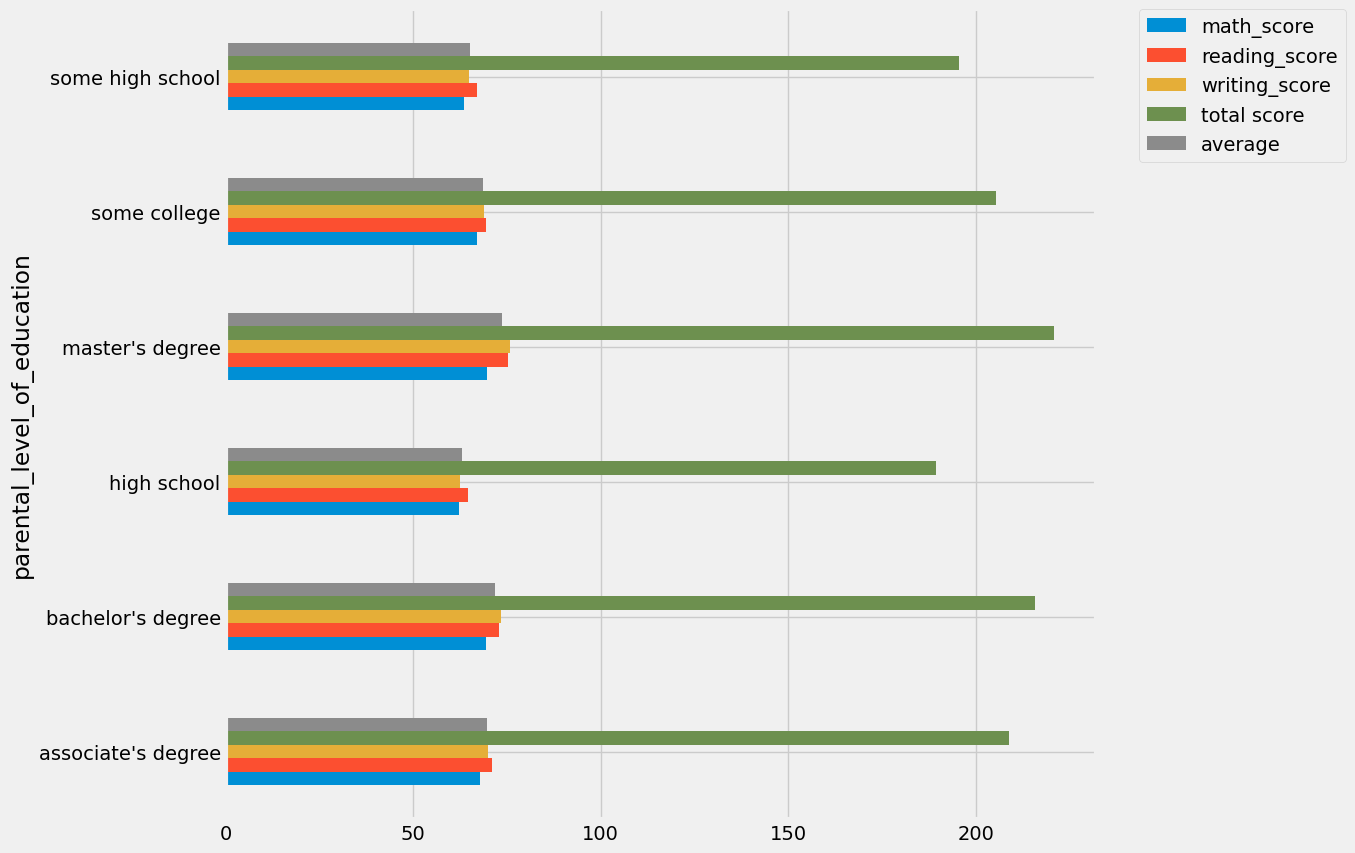

In [70]:
# bivariate analysis
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

__Insights__
<br>
- The score of student whose parents possess master and bachelor level education are higher than others.

4.4. On the basis of Lunch<br>
- Which type of lunch is common among the students? (univariate analysis)
- What effect does it have on the performance? (bivariate analysis)

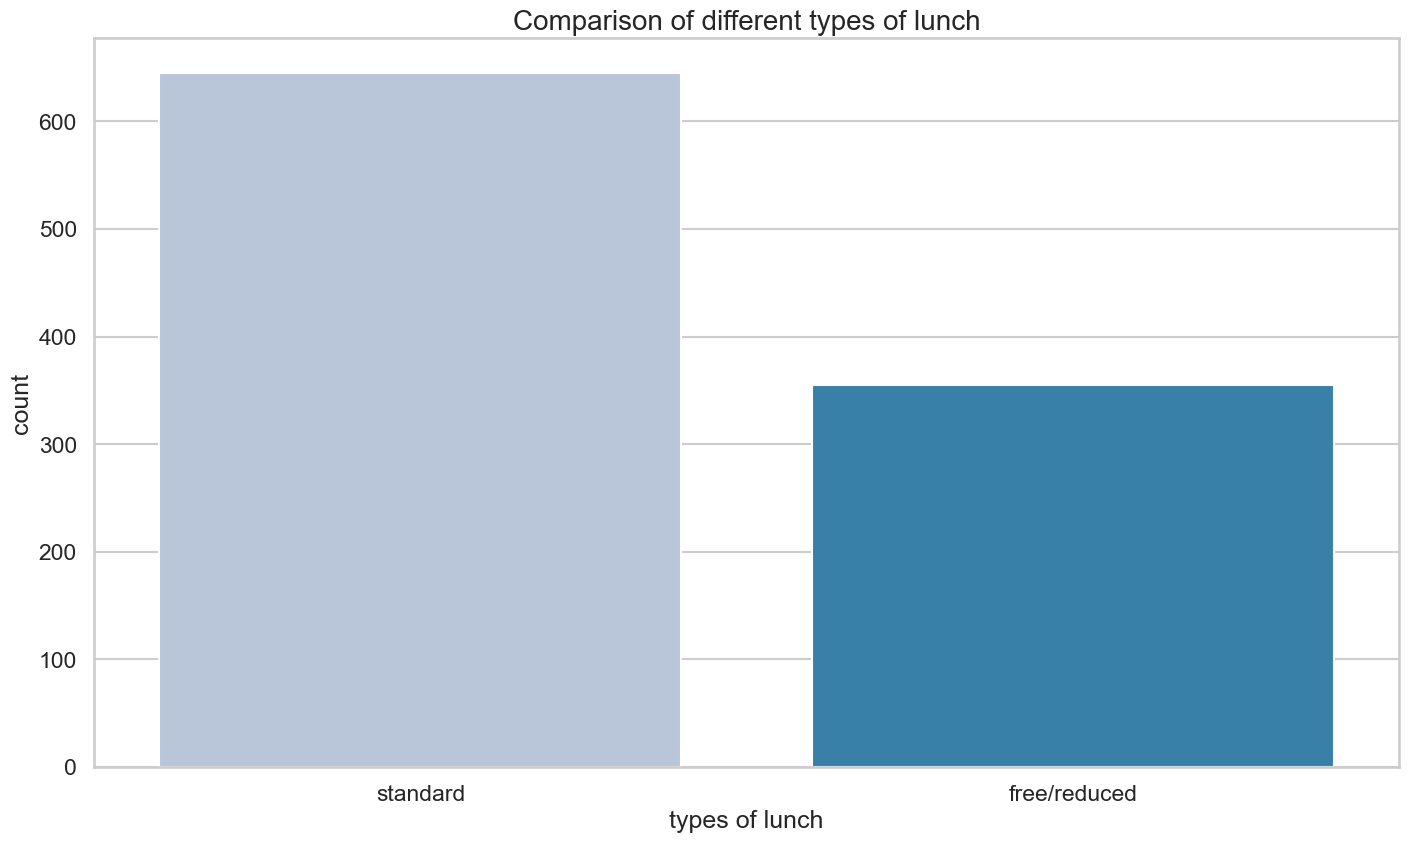

In [75]:
# univariate analysis
sns.set_theme(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-whitegrid')
sns.countplot(x = df['lunch'], data = df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

__Insights__
<br>
- Students being served Standard lunch was more than free lunch

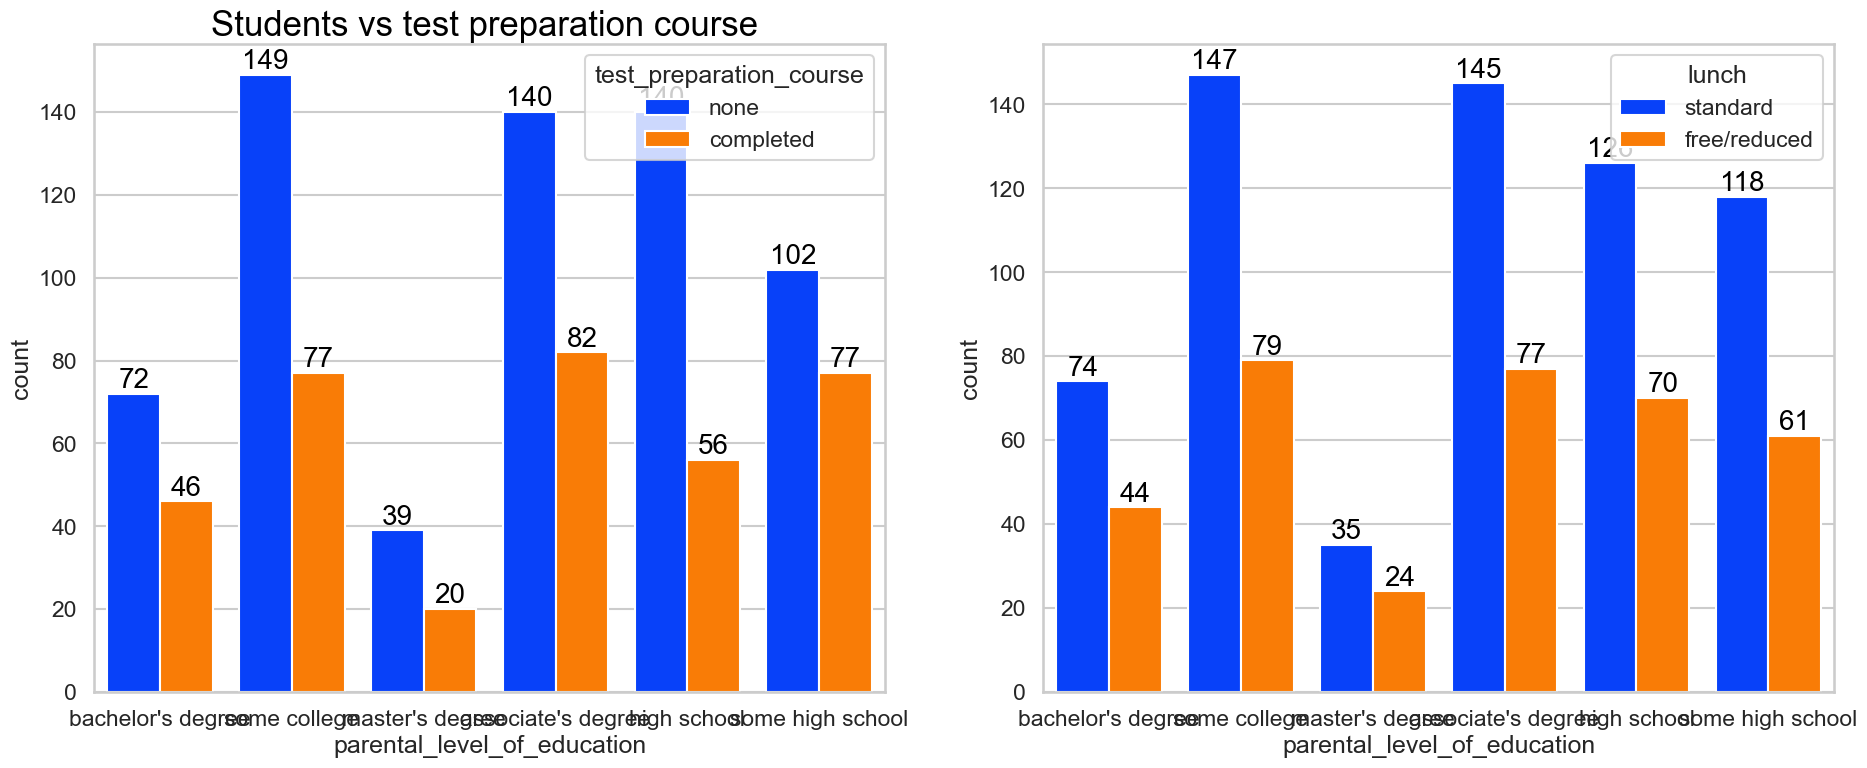

In [79]:
# bivariate analysis
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

__Insights__
<br>
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.5. On the basis of Test Preparation Course<br>
- How is the data distributed according to race/ethnicity? (univariate analysis)
- How the test preparation course affect the result of the student? (bivariate analysis)

<Axes: xlabel='lunch', ylabel='writing_score'>

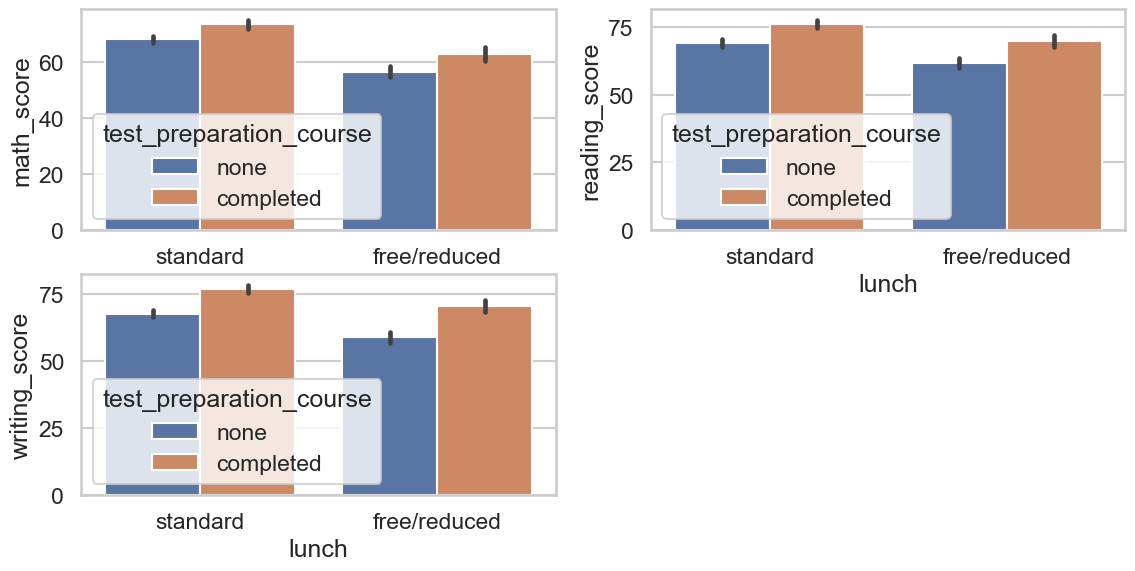

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

__Insights__
<br>
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.6. Checking the ouliers<br>

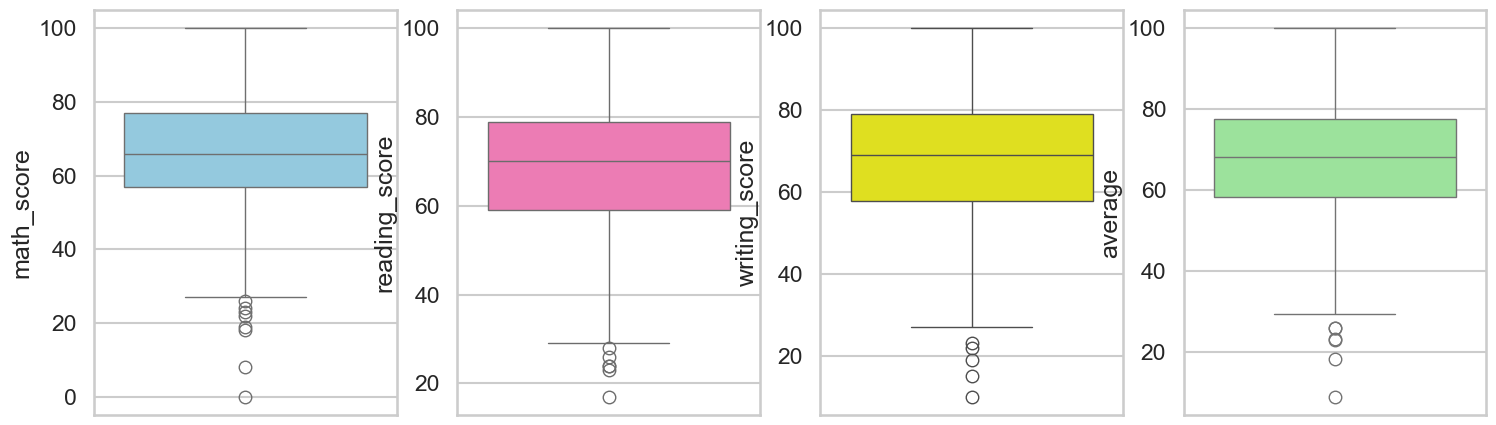

In [83]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.7. Multivariate analysis using pairplot<br>

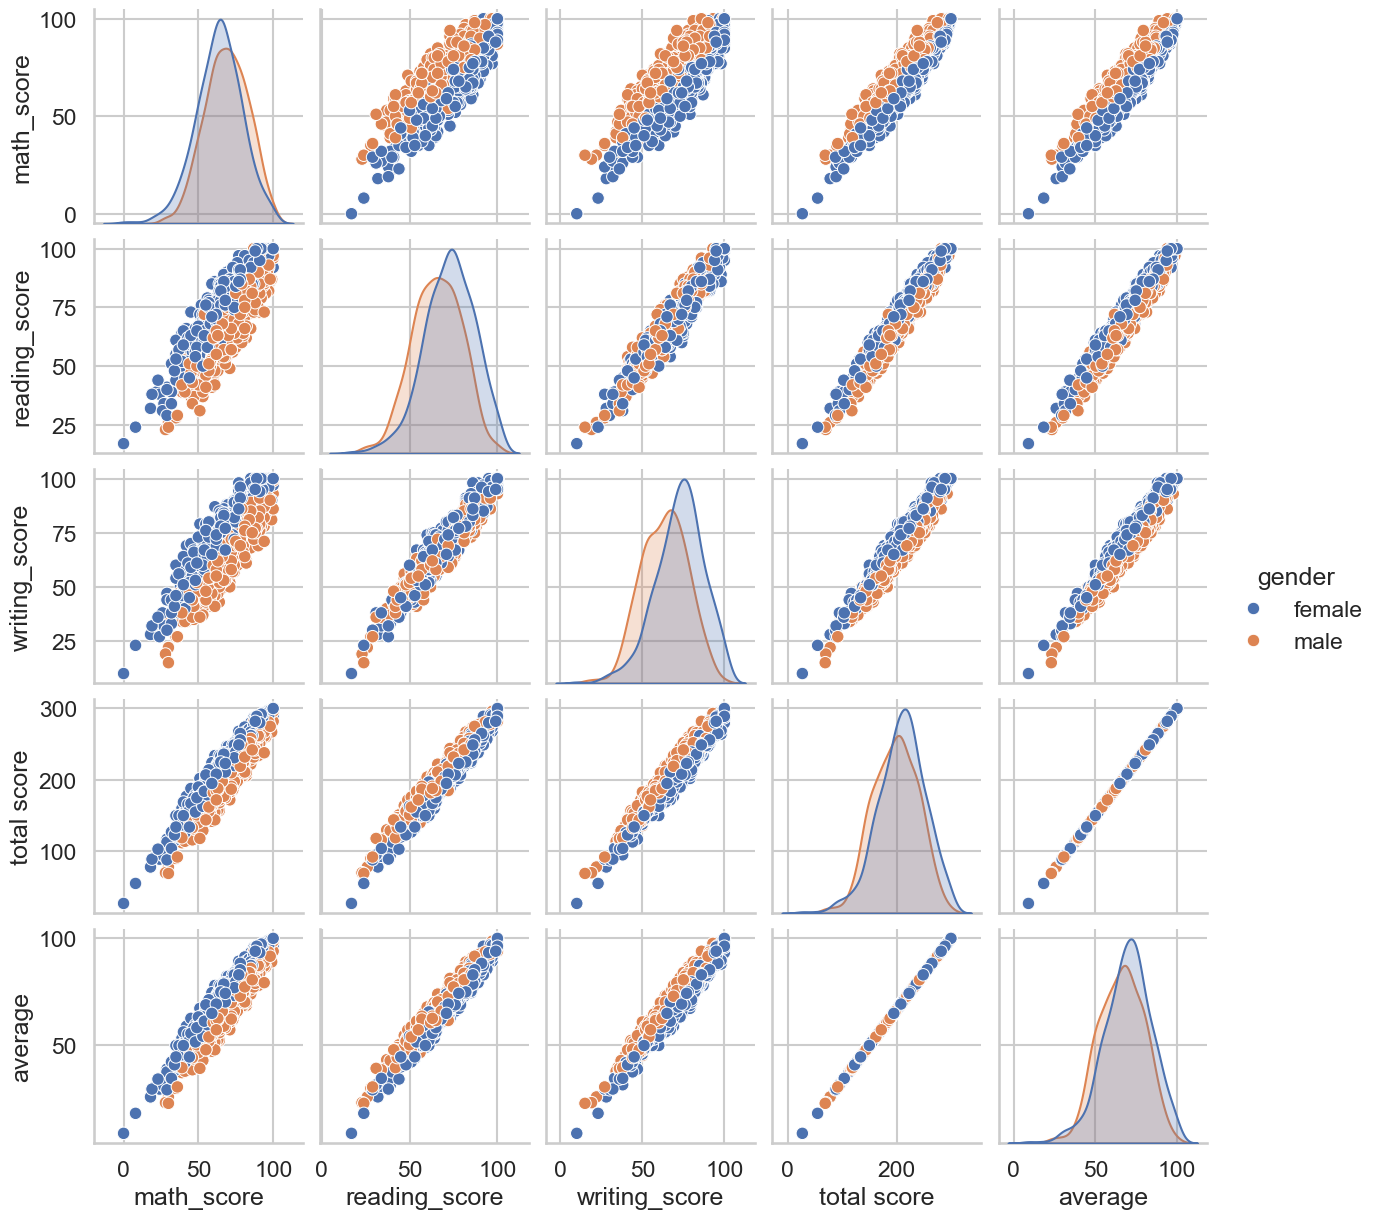

In [84]:
sns.pairplot(df,hue = 'gender')
plt.show()

__Insights__
<br>
- From the above plot it is clear that all the scores increase linearly with each other.

#### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.